In [1]:
import pandas as pd # library to provide data structure, daframe, table and series
import numpy as np # library to mathematical operation, matrices and arrays
import matplotlib.pyplot  as plt # library to create statics, interact and charts plots
import seaborn as sns # library to working complex visualization,also improve aesthetic of plot.
# allow to Jupyter Notebook cell to enable inline plotting.
%matplotlib inline    

In [2]:
# assign a variable to get dataset
df = pd.read_csv("fortune500.csv")
# display the dataframe
df

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


## Task 1: Generate a plot detailing the top 5 Companies by Revenue for each Decade

# Approach:
    
<h3>Data Preparation:</h3>  
    
    * Extract the required columns from the dataset: Company, Revenue, and Year.
    * Data were grouped by decade  as required (1950-1959, 1960-1969, etc.).
    * Companies will be ranked each decade by revenue in descending order.
    * Selecting the 5 best companies of each decade.

In [3]:
# reassign a variable to get a copy from the original dataset
df_copy01 = df.copy()
# create a new column Decade and 
df_copy01['Decade'] = (df['Year'] // 10) * 10

# reassing a variable and get Group by Decade and the top 5 companies by revenue
decadeTop5 = df_copy01.groupby(['Decade', 'Company'])['Revenue (in millions)'].sum().reset_index()
# reassing a variable to sort a values from these columns 'Decade' ascending order and then by 'Revenue (in millions)' in descending order 
decadeTop5= decadeTop5.sort_values(by=['Decade','Revenue (in millions)'], ascending=[True, False])
# reassing and Group by Decade and the top 5
decadeTop5 =decadeTop5.groupby('Decade').head(5)
# display the dataframe after reassing
decadeTop5.head()

,Decade,Company,Revenue (in millions)
254,1950,General Motors,53575.0
217,1950,Exxon Mobil,34434.5
231,1950,Ford Motor,20142.6
571,1950,U.S. Steel,19463.0
250,1950,General Electric,18601.0


# Visualization Choice:

 * A bar chart(plot) to show the top 5 companies of each decade.
 * set up X and Y (X-axis: Decades, Y-axis: Revenue).
 * Each decade will have a set of bars, one for each of the 5 largest companies.


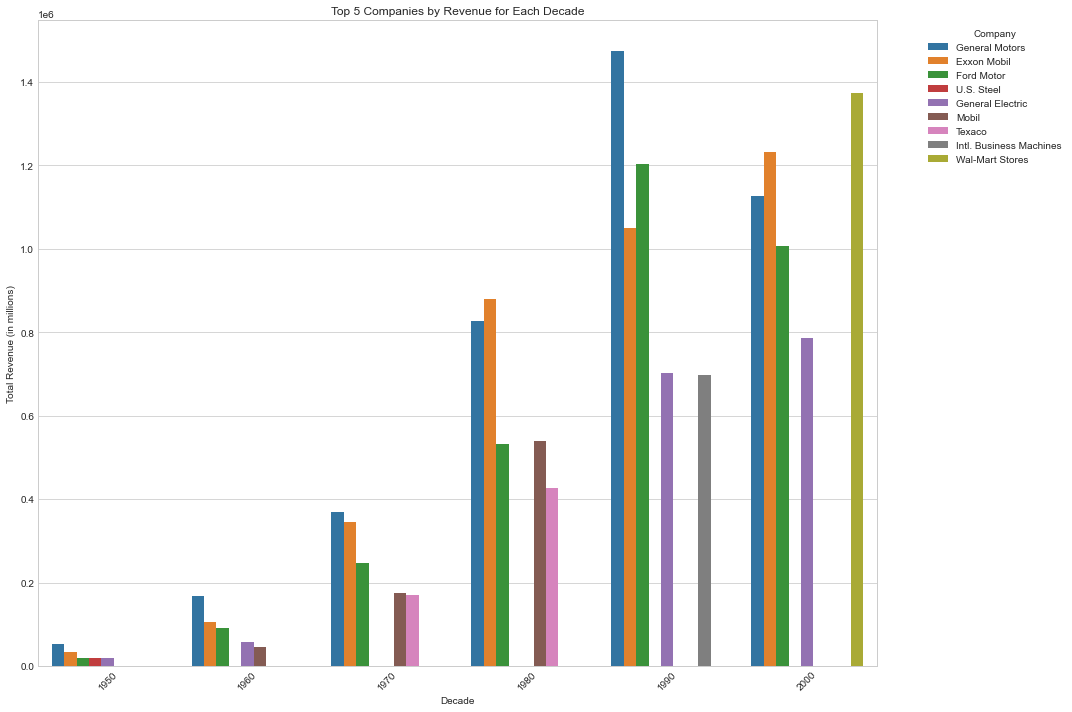

In [4]:
# Create a bar plot
plt.style.use("seaborn-whitegrid")# to get style to plot
plt.figure(figsize=(15, 10))# define height and width 
#display vertical bar, 'hue' parameter is used to differentiate the bars based on the 'Company' column,dodge parameter to display bar for each company beside each order.
sns.barplot(x='Decade', y='Revenue (in millions)', hue='Company', data=decadeTop5, dodge=True)
plt.title('Top 5 Companies by Revenue for Each Decade')# label the title
plt.xlabel('Decade')# label the x-axis plot
plt.ylabel('Total Revenue (in millions)')# label the y-axis plot
plt.xticks(rotation=45)# label decades at 45 degrees
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')# display title and companies on left side
plt.tight_layout()# get to space between plots
plt.show();# display the plot

# Rationale

 * Bar plots are effective for comparing the revenue of different companies over distint time periods
 (decades in this case). It's make easy comparison and ranking of companies based on their revenue.

## Task 2: Plot a graph depicting the distribution of “Revenue” in the top 20 Companies in 1971

# Approach:
    
<h3>Data Preparation:</h3>  
    
    * Filter the dataset by year 1971.
    * Sort companies by revenue in descending order.
    * Selecting the Top 20 Companies.


In [5]:
# reassign a variable to get a copy from the original dataset
df_copy02 = df.copy()
# # reassign a variable to the year equal to 1971
df_copy02=df[df['Year']==1971]
# reassing a variable to extract columns and reset
Top20 =df_copy02.groupby(['Year','Rank','Company'])['Revenue (in millions)'].sum().reset_index()
# reassing a variable to sort a values from these columns  
Top20 = Top20.sort_values(by=['Year','Revenue (in millions)'], ascending=[True, False]).head(20)
# display the dataframe after reassing
Top20.head()


,Year,Rank,Company,Revenue (in millions)
0,1971,1,General Motors,18752.4
1,1971,2,Exxon Mobil,16554.2
2,1971,3,Ford Motor,14979.9
3,1971,4,General Electric,8726.7
4,1971,5,Intl. Business Machines,7504.0


# Visualization Choice:

 * A barh (horizontal bar plot) visualize the distribution of revenue in the top 20 companies..
 * set up X and Y (X-axis: Revenue, Y-axis: Company).
   
   


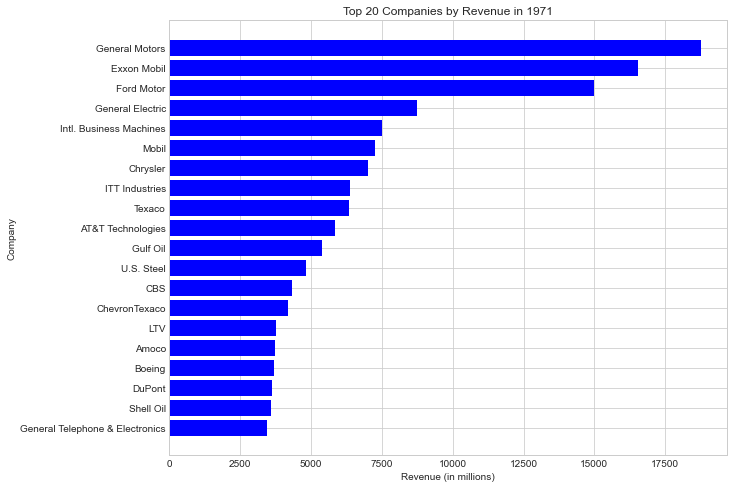

In [6]:

#
plt.figure(figsize=(10, 8))#  define height and width 
plt.barh(Top20['Company'],Top20['Revenue (in millions)'], color='blue')# create the bar horizontal from columns Company and revenue
plt.xlabel('Revenue (in millions)')# lable for x-axis plot
plt.ylabel('Company')# label  for y-axis plot
plt.title('Top 20 Companies by Revenue in 1971')# display the title
plt.gca().invert_yaxis()  # Invert y-axis to display the highest revenue at the top
plt.show()# display the plot

# Rationale:
 * By having category names, in this case company names, that are long and don't fit well on the vertical axis,
   a horizontal bar chart(plot) allows you to display the names in a more readable way.
   Also to emphasize the trend or pattern of a given data point across multiple categories.

## Task 3: Visualize which Top 10 Company’s profit increased the most between 1990 and 1999

# Approach:

* Filter the set of years from 1990 to 1999.
* Profit will be calculate for each company
* Company will be classified by profit increase

In [7]:
# Make a copy of the original DataFrame
df_copy3 = df.copy()
   # pd.to_numeric from :https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
# Convert 'Profit (in millions)' column to numeric without modifying the original DataFrame
df_copy3['Profit (in millions)'] = pd.to_numeric(df['Profit (in millions)'], errors='coerce')

# Filter data for the years between 1990 and 1999
filter_df = df_copy3[(df_copy3['Year'] >= 1990) & (df_copy3['Year'] <= 1999)]

# Calculate profit increase for each company between 1990 and 1999
Top10 = filter_df.groupby(['Company'])['Profit (in millions)'].sum().reset_index()

# Filter companies with positive profit increase between 1990 and 1999
Top10 = Top10[Top10['Profit (in millions)'] > 0]

# Sort the values first by 'Company' in ascending order and then by 'Profit (in millions)' in descending order
Top10 = Top10.sort_values(by=['Company', 'Profit (in millions)'], ascending=[True, False])

n = 10  # reassing a variable to get the top 10 companies with highest profit

# Get the top 10 companies with highest positive profit increase
top10_companies = Top10.nlargest(n, 'Profit (in millions)')
top10_companies

,Company,Profit (in millions)
320,Exxon Mobil,58080.0
378,General Electric,55996.0
43,Altria Group,45682.0
354,Ford Motor,40465.1
592,Merck,29624.5
471,Intel,29245.4
210,Coca-Cola,23865.7
17,AT&T,21759.0
146,Bristol-Myers Squibb,21321.9
606,Mobil,21240.0


# Visualization Choice:

 * A barh (horizontal bar plot)  to represent the top 10 companies have increase profit.
 * set up X and Y (X-axis: Companies, Y-axis: increase profit).


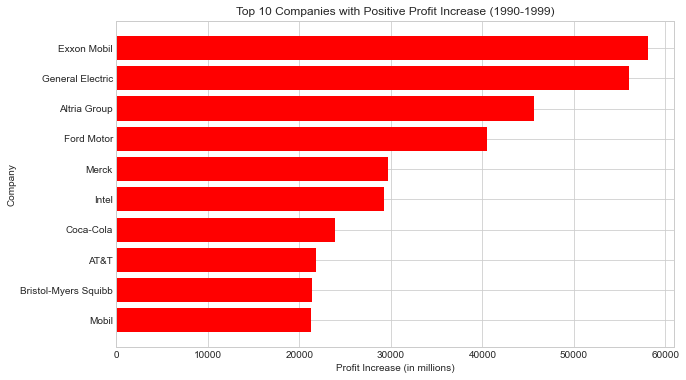

In [8]:
# Visualize the top 10 companies with positive profit increase
plt.figure(figsize=(10, 6))#  define height and width
plt.barh(top10_companies['Company'], top10_companies['Profit (in millions)'], color='red')
plt.xlabel('Profit Increase (in millions)') #lable for x-axis plot
plt.ylabel('Company') # label  for y-axis plot
plt.title('Top 10 Companies with Positive Profit Increase (1990-1999)') # # display the title
plt.gca().invert_yaxis()  # Invert y-axis to display the company with the highest increase on top
plt.show()# display the plot

# Rationale:
* The bar plot in this scenario is effective for comparing profit growth between different companies. 
  This visualization helps you identify which companies had the most significant profit growth during the specified period.

## Task 4: Observe and plot the average revenue by decade

# Approach:

<h3>Data Preparation:</h3>  
    
    * Data will be group by decade.
    * Average revenue will be calculated every decade.

In [9]:
#reassing and get copy from original dataset
df_copy01 = df.copy()

# Calculate the decade for each year
df_copy01['Decade'] = (df['Year'] // 10) * 10

# Group by Decade and calculate the average revenue for each decade
decade_avg_revenue = df_copy01.groupby('Decade')['Revenue (in millions)'].mean().reset_index()
# display the dataframe after reassing
decade_avg_revenue.head()



,Decade,Revenue (in millions)
0,1950,335.05244
1,1960,549.35638
2,1970,1522.21072
3,1980,3483.96466
4,1990,7351.89874


## Visualization Choice:

* A line plot to represent the trend of average revenue over decades.
* Set up X, Y(X-axis: Decades, Y-axis: Average Revenue).

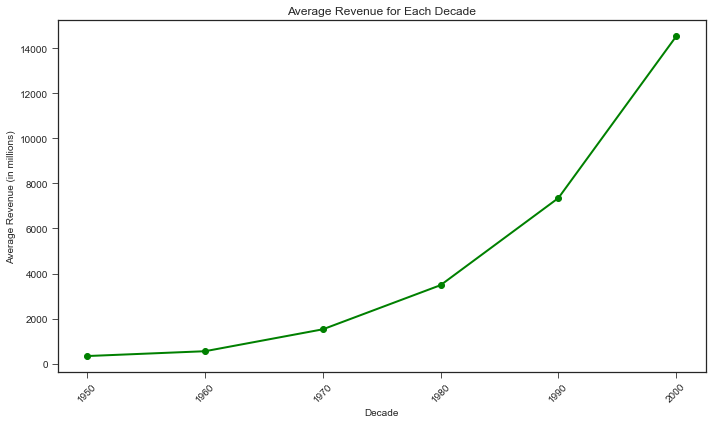

In [10]:
# Create a line plot for average revenue by decade
plt.style.use("seaborn-ticks")# style the background plot
plt.figure(figsize=(10, 6))#  define height and width 
# display the line plot by columns Decade and  Revenue and style it.
plt.plot(decade_avg_revenue['Decade'], decade_avg_revenue['Revenue (in millions)'], marker='o', color='green', linewidth=2)
plt.title('Average Revenue for Each Decade')# label the title
plt.xlabel('Decade')# label the x-axis plot
plt.ylabel('Average Revenue (in millions)')# label  the y-axis
plt.xticks(rotation=45)#label decades at 45 degrees
plt.tight_layout()# get space between subplots
plt.show()# display the plot

# Rationale:
* Line charts are useful for representing trends over a continuous range and can be easily visualized, 
  in this case for example it is much better to see a line chart
  than bar charts as you can see the average revenue in different decades.